In [154]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [155]:
df = pd.read_csv("../msd_pre.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   title         1000000 non-null  object 
 1   year          1000000 non-null  int64  
 2   popularity    581965 non-null   float64
 3   duration      1000000 non-null  float64
 4   danceability  1000000 non-null  float64
 5   energy        1000000 non-null  float64
 6   key           1000000 non-null  int64  
 7   loudness      1000000 non-null  float64
 8   mode          1000000 non-null  int64  
 9   tempo         1000000 non-null  float64
 10  signature     1000000 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 83.9+ MB


In [156]:
df.drop("title", axis=1, inplace=True)
df.drop("energy", axis=1, inplace=True)
df.drop("danceability", axis=1, inplace=True)

df.describe()

,year,popularity,duration,key,loudness,mode,tempo,signature
count,1000000.000000,581965.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1030.325652,0.447789,249.500755,5.321964,-10.124039,0.666408,123.889369,3.593947
std,998.745002,0.373834,126.229636,3.601595,5.197245,0.471496,35.055810,1.221925
min,0.000000,0.000000,0.313020,0.000000,-58.178000,0.000000,0.000000,0.000000
25%,0.000000,0.072594,180.740770,2.000000,-12.672000,0.000000,97.995000,3.000000
50%,1969.000000,0.381671,228.858320,5.000000,-8.963000,1.000000,122.086500,4.000000
75%,2002.000000,0.908936,289.932610,9.000000,-6.386000,1.000000,144.089000,4.000000
max,2011.000000,1.000000,3034.905670,11.000000,4.318000,1.000000,302.300000,7.000000


In [157]:
df = df[df["tempo"] != 0]
df = df[df["year"] != 0]
df = df[df["popularity"] != 0]
df = df[df["duration"] != 0]

# df['duration'] = df['duration'] * 1000

df = df.dropna()

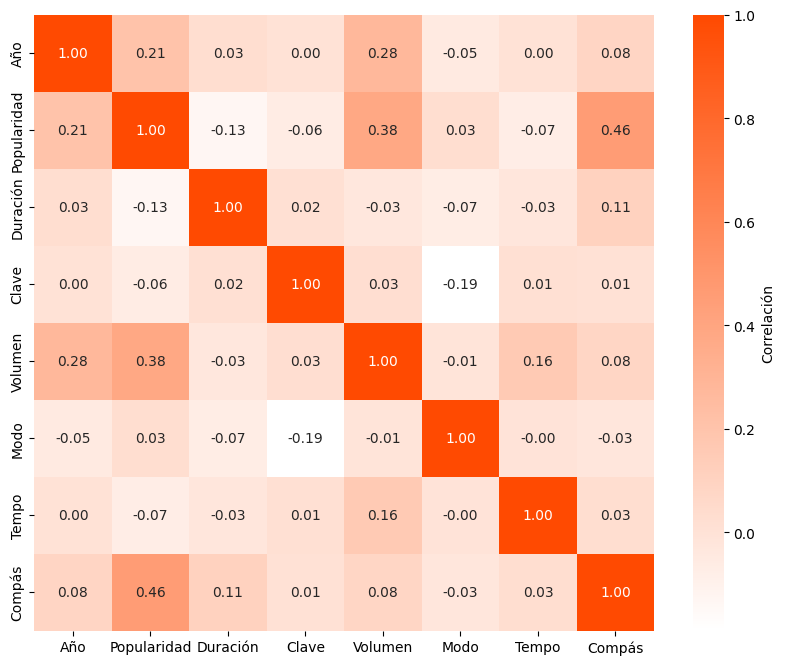

In [158]:
correlation_matrix = df.corr()

columnas_espanol = {
    'year': 'Año',
    'popularity': 'Popularidad',
    'duration': 'Duración',
    'key': 'Clave',
    'loudness': 'Volumen',
    'mode': 'Modo',
    'tempo': 'Tempo',
    'signature': 'Compás'
}

columnas_renombradas = [columnas_espanol.get(col, col) for col in correlation_matrix.columns]

colors = ["#ffffff", "#ff4a01"]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, fmt=".2f",
            xticklabels=columnas_renombradas, yticklabels=columnas_renombradas,
            cbar_kws={'label': 'Correlación'})

# plt.title("Heatmap de Correlación", fontsize=15)
plt.show()

## Año
### Histograma

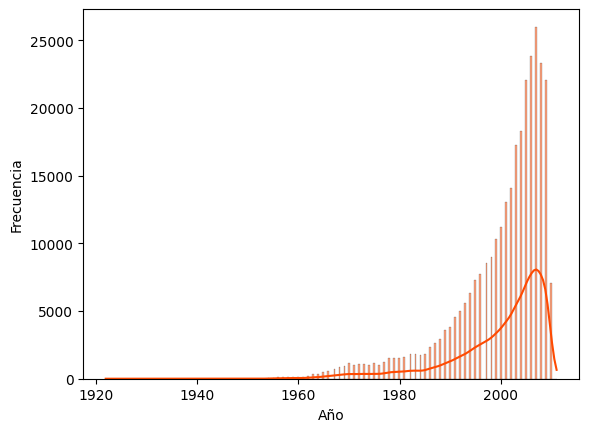

In [159]:
sns.histplot(df['year'], kde=True, color="#ff4a01")
# plt.title('Distribución del Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

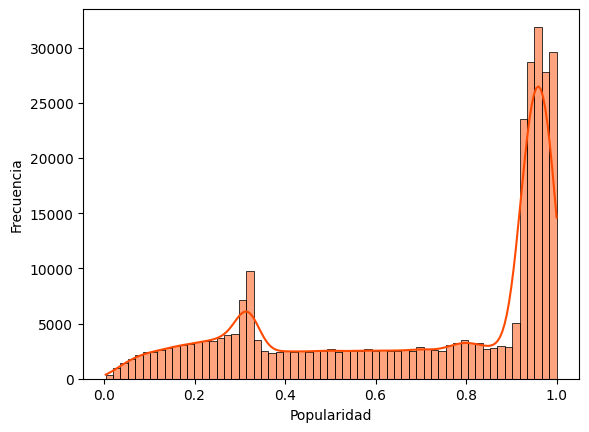

In [160]:
sns.histplot(df['popularity'], kde=True, color="#ff4a01")
# plt.title('Distribución de la Popularidad')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.show()

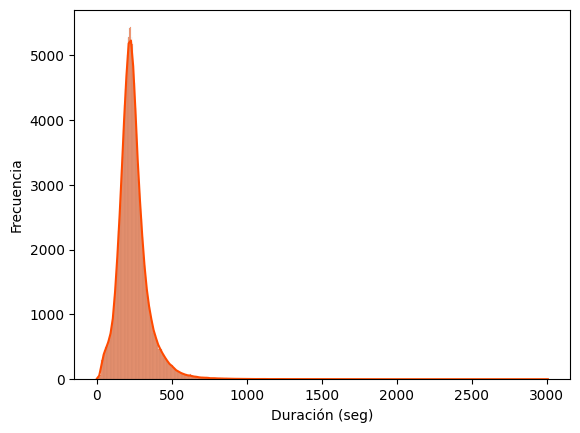

In [161]:
sns.histplot(df['duration'], kde=True, color="#ff4a01")
# plt.title('Distribución de la Duración')
plt.xlabel('Duración (seg)')
plt.ylabel('Frecuencia')
plt.show()

In [162]:
count = (df["duration"] > 1000).sum()
count

480

/var/folders/sq/s1hchcbd0n790b_34z0nxrvc0000gn/T/ipykernel_3995/3291454435.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_popularity_by_duration = df.groupby('duration_bin')['popularity'].mean()


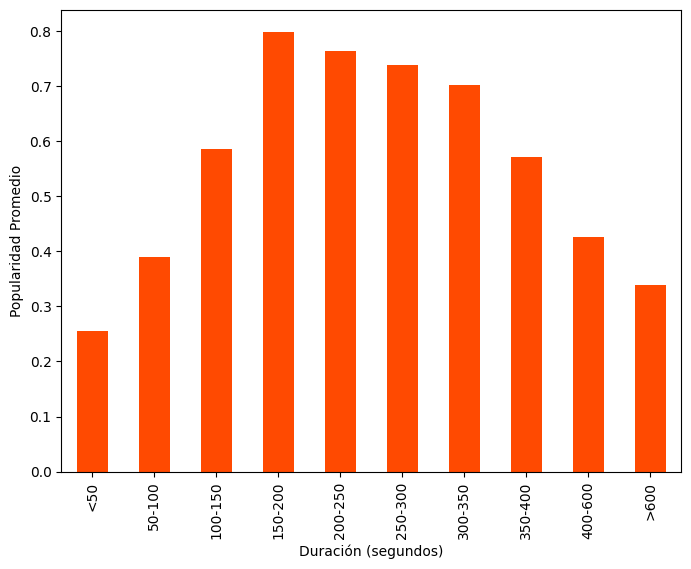

In [168]:
df['duration_bin'] = pd.cut(df['duration'], bins=[0, 50, 100, 150, 200, 250, 300, 350, 400, 600, 1000], labels=["<50", "50-100", "100-150", "150-200", "200-250", "250-300", "300-350", "350-400", "400-600", ">600"])

avg_popularity_by_duration = df.groupby('duration_bin')['popularity'].mean()

avg_popularity_by_duration.plot(kind='bar', color='#ff4a01', figsize=(8, 6))
# plt.title("Popularidad Promedio por Rango de Duración")
plt.xlabel("Duración (segundos)")
plt.ylabel("Popularidad Promedio")
plt.show()

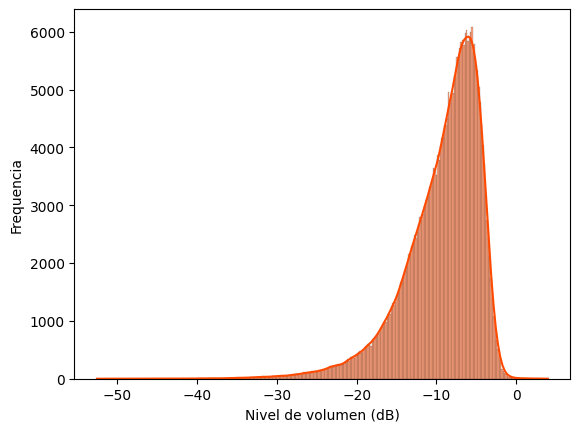

In [ ]:
sns.histplot(df['loudness'], kde=True, color="#ff4a01")
# plt.title('Distribución del Ruido')
plt.xlabel('Nivel de volumen (dB)')
plt.ylabel('Frequencia')
plt.show()

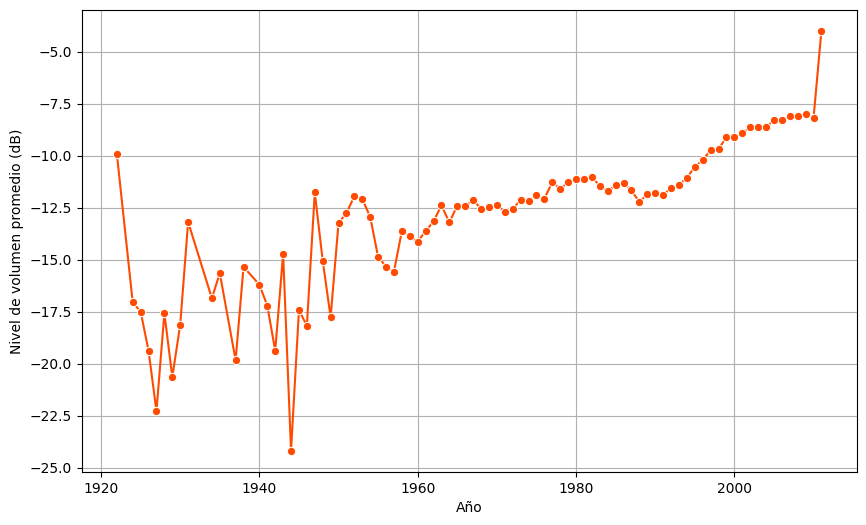

In [ ]:
loudness_by_year = df.groupby('year')['loudness'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='year', y='loudness', data=loudness_by_year, marker='o', color="#ff4a01")
# plt.title('Evolución del Loudness a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Nivel de volumen promedio (dB)')
plt.grid(True)
plt.show()

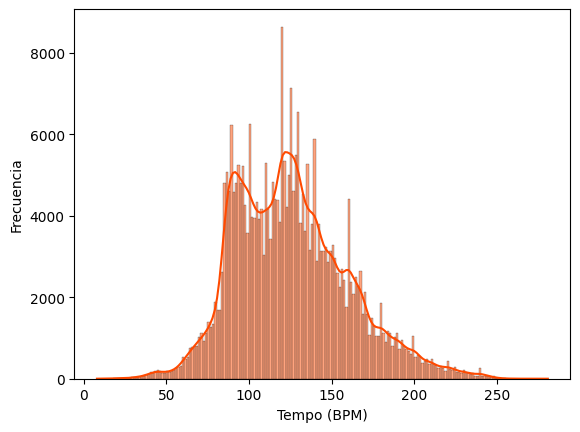

In [ ]:
sns.histplot(df['tempo'], kde=True, color="#ff4a01")
# plt.title('Distribución del Tempo')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Frecuencia')
plt.show()

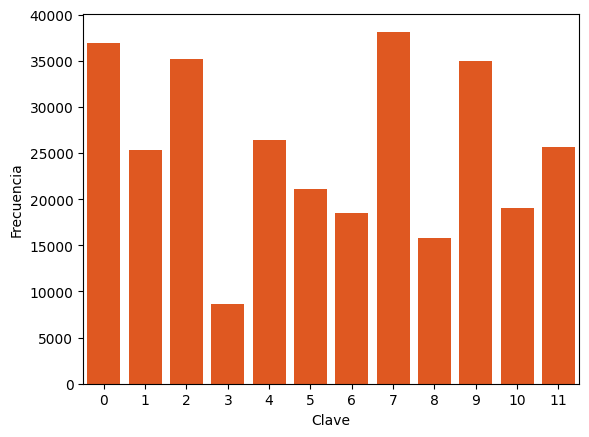

In [ ]:
sns.countplot(x=df['key'], color="#ff4a01")
# plt.title('Distribución de la Clave')
plt.xlabel('Clave')
plt.ylabel('Frecuencia')
plt.show()

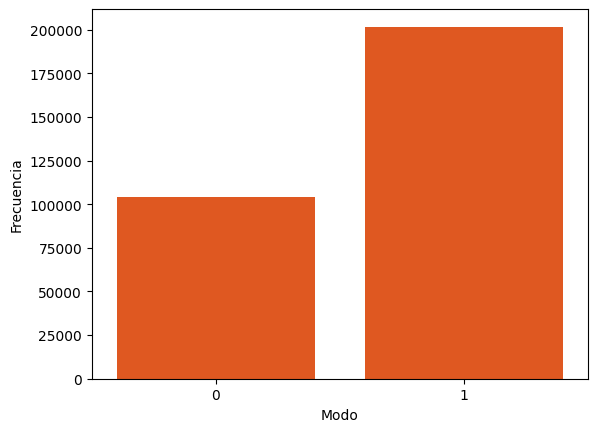

In [ ]:
sns.countplot(x=df['mode'], color="#ff4a01")
# plt.title('Distribución del Modo')
plt.xlabel('Modo')
plt.ylabel('Frecuencia')
plt.show()

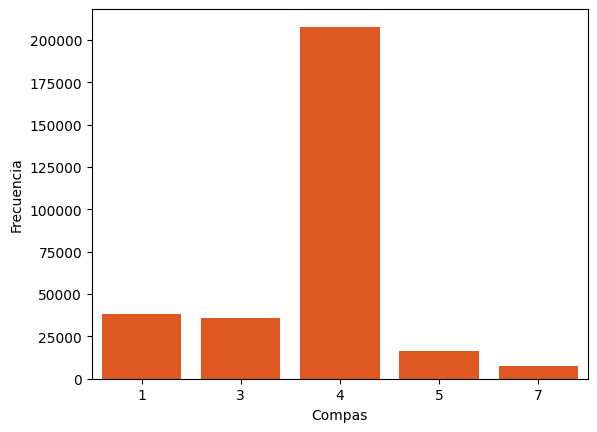

In [ ]:
sns.countplot(x=df['signature'], color="#ff4a01")
# plt.title('Distribución del Compas')
plt.xlabel('Compas')
plt.ylabel('Frecuencia')
plt.show()